# Star Wars Survey: Which episode is the most favorite?

In this project, we are going to learn about the preference of respondents towards the star wars episodes(1-6).   

## About the data set

This [data set](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) is collected by the team at FiveThirtyEight to address the question: **Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**. They surveyed Star Wars fans using the online tool SurveyMonkey and there are 835 total responses.

In [1]:
# import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# path of raw data in github
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/star-wars-survey/StarWars.csv'
star_wars = pd.read_csv(url, error_bad_lines=False, encoding="ISO-8859-1")
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning data

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

### Remove rows with NaN as `RepsondentID`

In [4]:
star_wars.dropna(subset = ['RespondentID'], inplace = True)

### Convert yes-no questions into boolean type

Since the next 2 columns `Have you seen any of the 6 films in the Star Wars franchise?` and `Do you consider yourself to be a fan of the Star Wars film franchise?` are yes-no questions, it will be easier to convert them into boolean type.

In [5]:
yes_no = {
    "Yes": True,
    "No": False
}
questions = ['Have you seen any of the 6 films in the Star Wars franchise?', 
             'Do you consider yourself to be a fan of the Star Wars film franchise?']

for q in questions:
    star_wars[q] = star_wars[q].map(yes_no)

star_wars[questions].head()

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,True,True
2,False,NaN
3,True,False
4,True,True
5,True,True


The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, *Which of the following Star Wars films have you seen? Please select all that apply.*

The columns for this question are:

- Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
- Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

We will turn these columns into the boolean type and simplify the column names. All non NaN value will be classified as **TRUE**.

In [6]:
# Rename the columns
star_wars = star_wars.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6'    
})

In [7]:
# assign value
for col in star_wars:
     if 'seen_' in col: 
            star_wars[col] = star_wars[col].apply(lambda x: False if pd.isnull(x) else True)
            
star_wars[[col for col in star_wars.columns if 'seen_' in col]].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


### Numerical type data

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

- Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
- Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones
- Unnamed: 11 - How much the respondent liked Star Wars: Episode III Revenge of the Sith
- Unnamed: 12 - How much the respondent liked Star Wars: Episode IV A New Hope
- Unnamed: 13 - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
- Unnamed: 14 - How much the respondent liked Star Wars: Episode VI Return of the Jedi

Therefore we will convert them into numeric and also simplify the column names.

In [8]:
# Convert columns into numeric
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [9]:
# Rename the columns
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'    
})

star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


## highest ranked movie

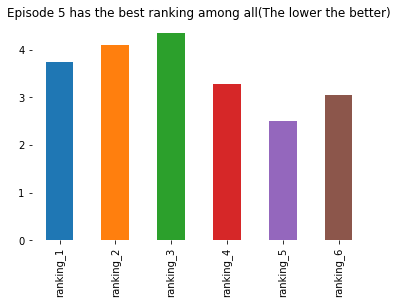

In [10]:
# mean ranking for each bunch
mean_ranking = star_wars[star_wars.columns[9:15]].mean()

fig = mean_ranking.plot.bar()
fig.set_title('Episode 5 has the best ranking among all(The lower the better)')
sns.despine(bottom=True, left=True)

Remember that the most favorite one is rank as 1. Therefore the lower the mean ranking indicates the respondents love it the best on average, which is **Star Wars: Episode V The Empire Strikes Back**. However, the ranking is based on the number of episodes seen by the respondents, which means if a respondent only watched episode 5, we will have 1 and only 1 in the episode 5 column. On the other hand, rank 6 will be given only when the respondent watched all 6 movies. Hence we should also take a look at the number seen for each episode.

## Most seen episode

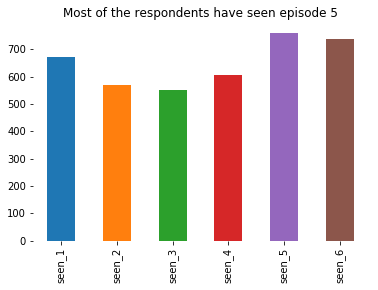

In [11]:
most_seen = star_wars[star_wars.columns[3:9]].sum()

fig, ax =plt.subplots()
ax = most_seen.plot.bar()
ax.set_title('Most of the respondents have seen episode 5')
sns.despine(bottom=True, left=True)

As mentioned, episode 5 has the highest seen number among all movies. It is normal that more rank 1 is given by the respondent, which leads to a lower mean.

## Analysis by groups

We have a glimpse for the overall favorite now. In the next step, we are going to split the data into several groups and see if there is any difference.

- *Star Wars fans vs non-Star Wars fans:* Will a fan will have different point of view?
- *Star Trek fans vs non-Star Trek fans:* How another space-episode fans think about star wars? 
- *Male vs Female:* Will the preference from different gender make a difference?

Since we will do the same bar chars of seen and rating for all 3 groups, it is better to build a function to reduce repetition.

In [12]:
# remove warning for missing NA value
import warnings

In [13]:
# function to plot a combined plots for ranking and seen by grouping
def grouped_plot(data, group, new_name):
    
    title_name = new_name # set group name on the plot's title
    
    if group == 'Gender':
        data[group] = data[group].map({'Male': True,
                                       'Female': False})
        title_name = 'Gender'
    
    # finding the mean of rank for each episode
    data_plot_rank = data.groupby(group)[data.columns[9:15]].mean()
    data_plot_rank = data_plot_rank.rename(columns={
    'ranking_1': 'E1',
    'ranking_2': 'E2',
    'ranking_3': 'E3',
    'ranking_4': 'E4',
    'ranking_5': 'E5',
    'ranking_6': 'E6'    
    })
    data_plot_rank['type'] = 'rank' # set type to distinguish rank and seen
    
    # finding the sum of seen for each episode
    data_plot_seen = data.groupby(group)[data.columns[3:9]].sum()
    data_plot_seen = data_plot_seen.rename(columns={
    'seen_1': 'E1',
    'seen_2': 'E2',
    'seen_3': 'E3',
    'seen_4': 'E4',
    'seen_5': 'E5',
    'seen_6': 'E6'    
    })
    data_plot_seen['type'] = 'seen' # set type to distinguish rank and seen
    
    # combine both data set and reshape for ploting
    data_plot = pd.concat([data_plot_rank, data_plot_seen], axis = 0).reset_index()
    data_plot = data_plot.melt(
        id_vars=[group, 
                 'type'], 
        var_name='episode', 
        value_name='value'
    )
    # rename the group according to the input: new_name
    data_plot = data_plot.rename(columns={group: new_name})
    
    # plot bar chart for rank and seen by group
    for target in data_plot['type'].unique():
        g = sns.FacetGrid(data_plot[data_plot['type'] == target], 
                          col=new_name
                         )
        g.map(sns.barplot, 'episode', 'value', 
              order = ['E1','E2','E3','E4','E5','E6'])
        # set y axis label to note the content: rank / seen
        g.axes[0,0].set_ylabel(target+' value')
        
        # add title at the first facetgrid
        if target == data_plot['type'].unique()[0]:
            plt.subplots_adjust(top= 0.8)
            g.fig.suptitle('Seen and Ranking by Group: '+ title_name)


### Star Wars fans vs non Star Wars fans

In [14]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

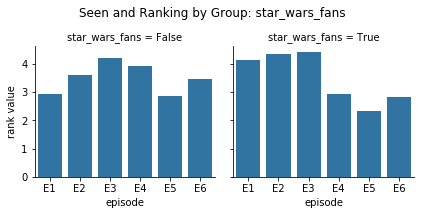

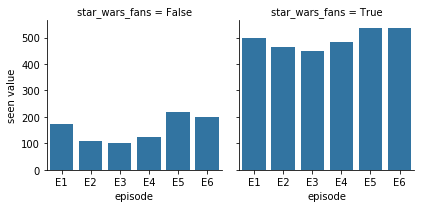

In [15]:
warnings.simplefilter(action='ignore', category=FutureWarning)
grouped_plot(star_wars, 
             'Do you consider yourself to be a fan of the Star Wars film franchise?', 
             'star_wars_fans')

We can see a huge difference from ranking: star wars fans gave a much higher ranking for episode 4-6 (more than 1 point on average!) and this does not appear in the non-fans ranking. However, both of them agreed episode 5 is the best of all. The number seen from the fans is much higher than expected. Interestingly, each episode has the same order in the number of seen if we rank the number of seen in both groups.

### Star Trek fans vs Non-Star Trek fans

In [16]:
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts()

No     641
Yes    427
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

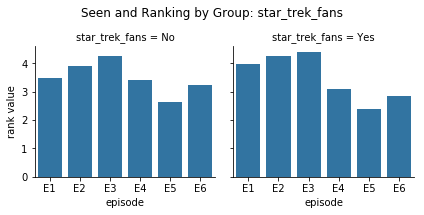

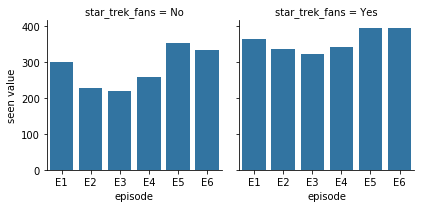

In [17]:
grouped_plot(star_wars, 
             'Do you consider yourself to be a fan of the Star Trek franchise?', 
             'star_trek_fans')

A similar result for the groups in star trek fans for the ranking, but not so extreme. Episode 5 is still the winner in both groups. Comparing to star war fans, more non-star trek fans have watched the films from star wars. Also, the difference between star-trek-group is not as large as star-wars-groups. It shows that a fan of star wars is not necessary a fan of star trek.

### Male vs female

In [18]:
star_wars['Gender'].value_counts()

Female    549
Male      497
Name: Gender, dtype: int64

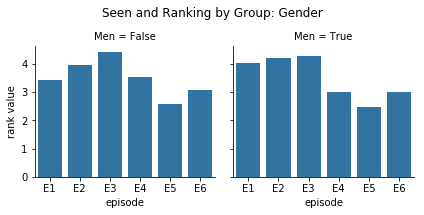

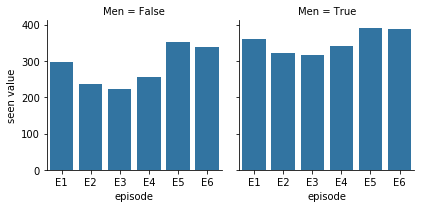

In [19]:
grouped_plot(star_wars, 
             'Gender', 
             'Men')

The result between gender is almost the same as the star-trek-groups if we consider men as the fans and female as the non-fans.

## Conclusion

Although we have separated the data into groups under different characteristics, the general results among groups are quite similar. Episode 5 is the most favorite one without any questions. One more interesting thing we can observe is the difference between E1 to E3 and E4 to E6. All evidence showed that the old ones, E4 to E6, have a higher ranking than the new ones, E1 to E3. Somehow the latest is not always the best.